In [1]:
#pca improves speed of training, when very large no features
#pca req less memory


In [2]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [3]:
oli=datasets.fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /Users/aashishchoudhary/scikit_learn_data


In [4]:
oli

{'data': array([[0.30991736, 0.3677686 , 0.41735536, ..., 0.15289256, 0.16115703,
         0.1570248 ],
        [0.45454547, 0.47107437, 0.5123967 , ..., 0.15289256, 0.15289256,
         0.15289256],
        [0.3181818 , 0.40082645, 0.49173555, ..., 0.14049587, 0.14876033,
         0.15289256],
        ...,
        [0.5       , 0.53305787, 0.607438  , ..., 0.17768595, 0.14876033,
         0.19008264],
        [0.21487603, 0.21900827, 0.21900827, ..., 0.57438016, 0.59090906,
         0.60330576],
        [0.5165289 , 0.46280992, 0.28099173, ..., 0.35950413, 0.3553719 ,
         0.38429752]], dtype=float32),
 'images': array([[[0.30991736, 0.3677686 , 0.41735536, ..., 0.37190083,
          0.3305785 , 0.30578512],
         [0.3429752 , 0.40495867, 0.43801653, ..., 0.37190083,
          0.338843  , 0.3140496 ],
         [0.3429752 , 0.41735536, 0.45041323, ..., 0.38016528,
          0.338843  , 0.29752067],
         ...,
         [0.21487603, 0.20661157, 0.2231405 , ..., 0.15289256,
     

In [5]:
print(oli.DESCR)  #images of 40 people, 10 img of each, and a target value

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   ===========

In [6]:
oli.keys()

dict_keys(['data', 'images', 'target', 'DESCR'])

In [7]:
oli['data'].shape     #400 img ,flattended into 64 by 64 pixel=4096 array 

(400, 4096)

In [8]:
oli['images'].shape

(400, 64, 64)

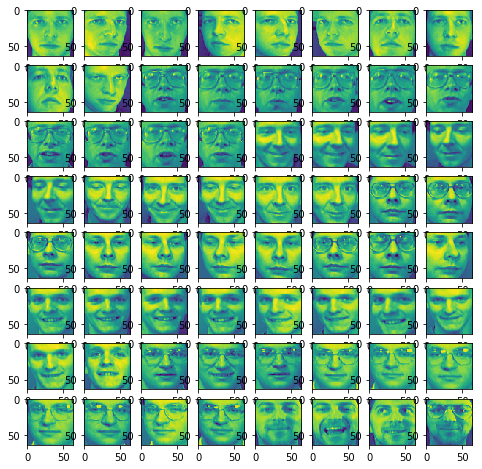

In [9]:
fig=plt.figure(figsize=(8,8))   #8 * 8 space
for i in range(64):        #working on 64 images
    ax=fig.add_subplot(8,8,i+1)    #in 8 row, 8 col, position of ith img is i+1
    ax.imshow(oli.images[i])
plt.show()

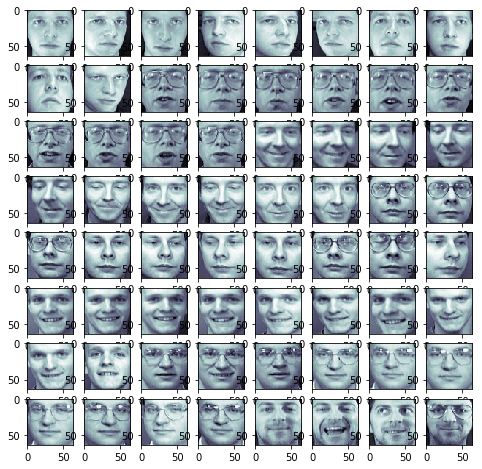

In [10]:
fig=plt.figure(figsize=(8,8))   #8 * 8 space
for i in range(64):        #working on 64 images only in 8*8 grid
    ax=fig.add_subplot(8,8,i+1)    #in 8 row, 8 col, position of ith img is i+1
    ax.imshow(oli.images[i],cmap=plt.cm.bone)
plt.show()

In [11]:
x=oli.data
y=oli.target

In [12]:
pca=PCA()

In [13]:
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [14]:
pca.components_

array([[-0.00419108, -0.0071095 , -0.0093361 , ...,  0.0001852 ,
         0.00337969,  0.00318829],
       [-0.0285913 , -0.03328845, -0.03784651, ...,  0.0296278 ,
         0.02721298,  0.02488896],
       [ 0.001357  , -0.00032572, -0.00019798, ..., -0.01541373,
        -0.01370984, -0.01188347],
       ...,
       [ 0.00223493,  0.02056659,  0.01515914, ..., -0.01273556,
        -0.05848991, -0.07650287],
       [ 0.01714708,  0.02917742, -0.00942486, ...,  0.00159098,
         0.01249339, -0.0081527 ],
       [-0.00326934,  0.01032978,  0.01475757, ..., -0.01187175,
        -0.01629114, -0.00553756]], dtype=float32)

In [15]:
pca.components_.shape    #400 images, 4096 data pts /pixels or row entries.


(400, 4096)

In [16]:
total=sum(pca.explained_variance_)
k=0
currentVarianceSum=0
while currentVarianceSum/total<0.99:
    currentVarianceSum+=pca.explained_variance_[k]
    k+=1


In [17]:
k     #so 260 features are enough to keep 99% variance

260

In [18]:
total=sum(pca.explained_variance_)
k=0
currentVarianceSum=0
while currentVarianceSum/total<0.95:
    currentVarianceSum+=pca.explained_variance_[k]
    k+=1
k   #123 are enough enough for 95% of data

123

In [19]:
pca=PCA(n_components=k)

In [20]:
transformed_data=pca.fit_transform(x)
transformed_data.shape

(400, 123)

In [21]:
#keep whiten=True in pca=PCA(n_components=k), & check if results improve.It helps improve accuracy.Can also be used in other classifiers

In [22]:
pca=PCA(n_components=k,whiten=True)
transformed_data=pca.fit_transform(x)
transformed_data.shape

(400, 123)

In [23]:
x_approx=pca.inverse_transform(transformed_data)  #taking inverse transform
x_approx.shape

(400, 4096)

In [25]:
x_approx_images=x_approx.reshape((400,64,64))    #reshaping images .

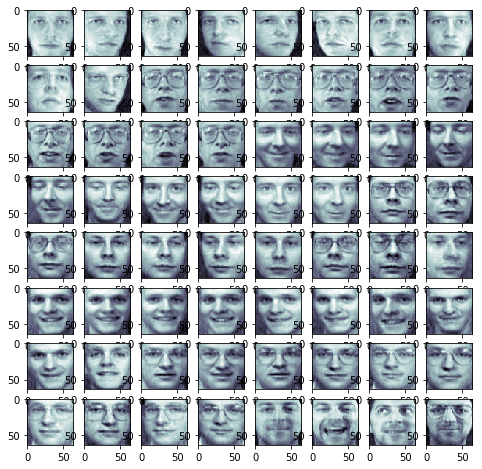

In [26]:
#plotting images obtained back by reversing from 123 to 400 features again. 
fig=plt.figure(figsize=(8,8))   #8 * 8 space
for i in range(64):        #working on 64 images only in 8*8 grid
    ax=fig.add_subplot(8,8,i+1)    #in 8 row, 8 col, position of ith img is i+1
    ax.imshow(x_approx_images[i],cmap=plt.cm.bone)
plt.show()

In [27]:
eigenv=pca.components_   #eigen vectors

In [28]:
eigenv.shape

(123, 4096)

In [29]:
#converting eigen vector to images

In [30]:
eigenfaces=eigenv.reshape((123,64,64))

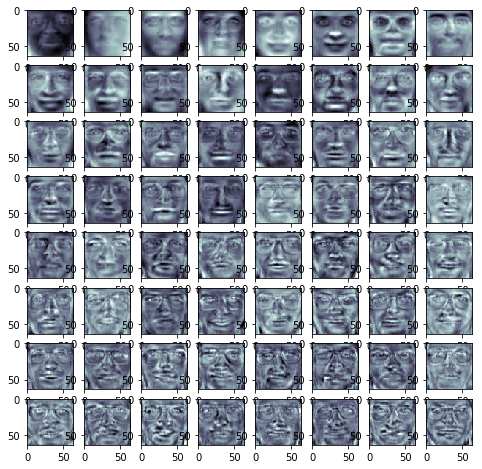

In [31]:
#plotting the eigen vectors that determine imp features/axis/dimensions
fig=plt.figure(figsize=(8,8))   #8 * 8 space
for i in range(64):        #working on 64 images only in 8*8 grid
    ax=fig.add_subplot(8,8,i+1)    #in 8 row, 8 col, position of ith img is i+1
    ax.imshow(eigenfaces[i],cmap=plt.cm.bone)
plt.show()

In [ ]:
#these eigenfaces/eigenvectors are similar to img, representing the features of a img.